In [1]:
# importing libraries
import idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the train test features and respective labels
trainImages = "Desktop/fashion_mnist/train-images-idx3-ubyte"
trainImages = idx2numpy.convert_from_file(trainImages)

testImages = "Desktop/fashion_mnist/t10k-images-idx3-ubyte"
testImages = idx2numpy.convert_from_file(testImages)

trainLabels = "Desktop/fashion_mnist/train-labels-idx1-ubyte"
trainLabels = idx2numpy.convert_from_file(trainLabels)

testLabels = "Desktop/fashion_mnist/t10k-labels-idx1-ubyte"
testLabels = idx2numpy.convert_from_file(testLabels)

In [3]:
# concatinating the train test features and the train test labels
x = np.concatenate((trainImages,testImages),axis = 0)
y = np.concatenate((trainLabels,testLabels),axis = 0)

In [4]:
# checking shape 
print(x.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [5]:
# splitting 70000 data into train test and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train
    ,test_size = 0.125)

print("Train set size: ")
print(X_train.shape)
print(y_train.shape)

print("Test set size: ")
print(X_test.shape)
print(y_test.shape)

print("Validation set size: ")
print(X_valid.shape)
print(y_valid.shape)

Train set size: 
(49000, 28, 28)
(49000,)
Test set size: 
(14000, 28, 28)
(14000,)
Validation set size: 
(7000, 28, 28)
(7000,)


In [6]:
# taking only 30000 data points for further analysis due to heavy computation

x = x[:30000,:,:]
y = y[:30000]

print(x.shape)
print(y.shape)

(30000, 28, 28)
(30000,)


In [7]:
# reshaping data for scaling
x = x.reshape(30000,-1)

In [8]:
# scaling the data as range of values are not matching, point where pixels are present values are high 
# whereas points where no pixels are present the value is 0

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# converting x to a dataframe from numpy array
x = pd.DataFrame(x)
x.shape

(30000, 784)

In [9]:
# splitting data again but for 30000 sample
# splitting 30000 data into train test and validation set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train
    ,test_size = 0.125)

print("Train set size: ")
print(X_train.shape)
print(y_train.shape)

print("Test set size: ")
print(X_test.shape)
print(y_test.shape)

print("Validation set size: ")
print(X_valid.shape)
print(y_valid.shape)

Train set size: 
(21000, 784)
(21000,)
Test set size: 
(6000, 784)
(6000,)
Validation set size: 
(3000, 784)
(3000,)


### Hierarchical Clustering

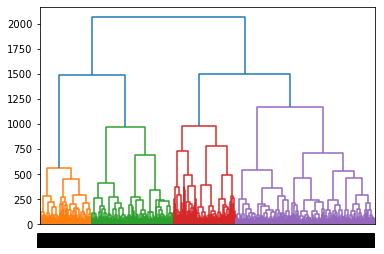

In [10]:
# plotting dendogram to see relationships of similarity among groups of entities
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X_train, method='ward'))

In [14]:
# creating instance of agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')

In [15]:
# predicting train set
y_pred_train = ac.fit_predict(X_train)

# using silhoutte performance metric
from sklearn.metrics import silhouette_score
train_score = silhouette_score(X_train,y_pred_train)
print(train_score)

0.11926740498791612


In [16]:
# predicting test set
y_pred_test = ac.fit_predict(X_test)

# using silhoutte performance metric
test_score = silhouette_score(X_test,y_pred_test)
print(test_score)

0.08927932293652585


In [17]:
# predicting validation set
y_pred_valid = ac.fit_predict(X_valid)

# using silhoutte score for performance metric
valid_score = silhouette_score(X_valid,y_pred_valid)
print(valid_score)

0.1151711546464848


In [18]:
print("Average score of train test and valid set:\n")
print("Training set:" )
print(train_score*100)
print("Test set:" )
print(test_score*100)
print("Valid set:")
print(valid_score*100)

Average score of train test and valid set:

Training set:
11.926740498791611
Test set:
8.927932293652585
Valid set:
11.51711546464848


### Density based Clustering

In [29]:
from sklearn.cluster import DBSCAN
# fitting the model
db = DBSCAN().fit(X_train)
labels = db.labels_

test_db = db.fit_predict(X_test)
valid_db = db.fit_predict(X_valid)

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score
# using adjusted_rand_score for  performance metric

train_score = adjusted_rand_score(labels,y_train)
test_score = adjusted_rand_score(test_db,y_test)
valid_score = adjusted_rand_score(valid_db,y_valid)

print("Training score: ", train_score)
print( "Test score: " , test_score )
print( "Validation score: " , valid_score )

Training score:  0.0
Test score:  0.0
Validation score:  0.0


As the performance of Hierarchical clustering is much better as compared to Density based clustering which failed to form clusters thus I would choose Hierarchical based clustering